# Project:

For each year of birth YYYY after 1879, we created a comma-delimited file called yobYYYY.txt. Each record in the individual annual files has the format "name,sex,number," where name is 2 to 15 characters, sex is M (male) or F (female) and "number" is the number of occurrences of the name. Each file is sorted first on sex and then on number of occurrences in descending order. When there is a tie on the number of occurrences, names are listed in alphabetical order. This sorting makes it easy to determine a name's rank. The first record for each sex has rank 1, the second record for each sex has rank 2, and so forth.

## 1 - Data format and contents

1. The working path:

In [1]:
pwd

u'C:\\Users\\Chuang\\Desktop\\Python Practice\\Project_National Data on the names'

2.Open and read one file:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

names1880 = pd.read_csv('yob1880.txt', names= ['name', 'sex', 'number'])
names1880.head()

,name,sex,number
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


3.Data structure of dataset:

In [3]:
names1880.shape

(2000, 3)

In [4]:
names1880.groupby('sex').count()['name']

sex
F     942
M    1058
Name: name, dtype: int64

## 2 - How to load total data sets?

In [5]:
years = range(1880, 2011)

pieces = []
columns = names= ['name', 'sex', 'number']

for year in years:   
    path = 'yob%d.txt' %year
    frame  = pd.read_csv(path, names = columns)
    frame['year'] = year
    pieces.append(frame)
    
names = pd.concat(pieces, ignore_index = True)

names.head()

,name,sex,number,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [6]:
names.shape #row * col

(1690784, 4)

## 3 - Analysis

**Plot number of names by gender over year**

In [7]:
total_number = names.pivot_table('number', index='year', columns='sex', aggfunc=sum)

total_number.head()

sex,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445


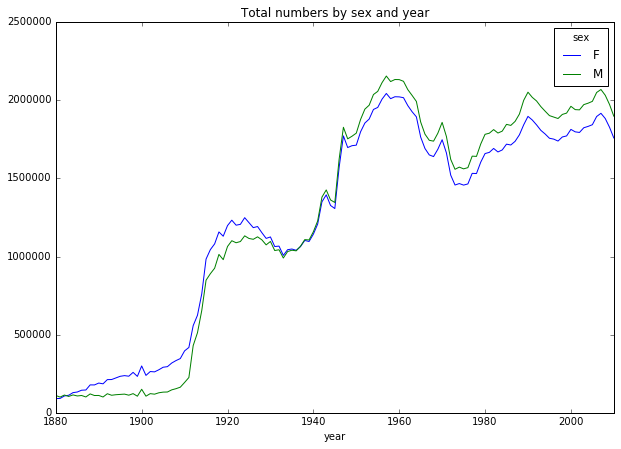

In [51]:
total_number.plot(figsize=(10,7),title='Total numbers by sex and year')

**Adding prop column**

In [9]:
def add_prop(data):
    number = data.number.astype(float) 
    data['prop'] = number / number.sum()
    return data

In [10]:
names = names.groupby(['sex','year']).apply(add_prop)

names.head()

,name,sex,number,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


**Top one names of girl and boy**

In [12]:
def get_topname(data):
    return data.loc[data.prop == data.prop.max(),['name','sex','number','year','prop']]

In [13]:
topname = names.groupby(['sex','year'], as_index=False).apply(get_topname)
topname.reset_index(level=1,inplace=True)
topname.head()

,level_1,name,sex,number,year,prop
0,0,Mary,F,7065,1880,0.077643
1,2000,Mary,F,6919,1881,0.075243
2,3935,Mary,F,8149,1882,0.075558
3,6062,Mary,F,8012,1883,0.071331
4,8146,Mary,F,9217,1884,0.071438


In [14]:
boys = topname[topname.sex == 'M']
boys_name = boys.drop(['sex','level_1'], axis=1)
boys_name.head()

,name,number,year,prop
131,John,9655,1880,0.087381
132,John,8769,1881,0.087039
133,John,9557,1882,0.084064
134,John,8894,1883,0.085003
135,John,9387,1884,0.082022


In [46]:
print 'The most popular male name: \n'
print set(boys_name.name)

The most popular male name: 

set(['James', 'Robert', 'Michael', 'David', 'Jacob', 'John'])


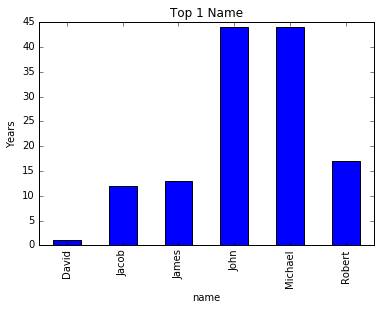

In [47]:
boys_name.groupby('name')['number'].count().plot(kind='bar', title = 'Top 1 Name')
plt.ylabel('Years')

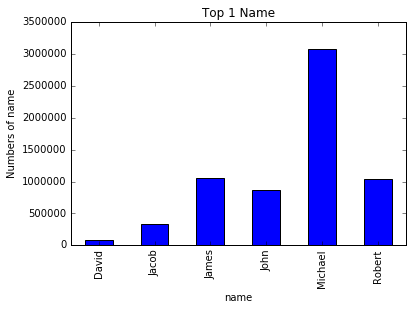

In [48]:
boys_name.groupby('name')['number'].apply(sum).plot(kind='bar', title = 'Top 1 Name')
plt.ylabel('Numbers of name')

In [18]:
girls = topname[topname.sex == 'F']
girls_name = girls.drop(['sex','level_1'], axis=1)
girls_name.head()

,name,number,year,prop
0,Mary,7065,1880,0.077643
1,Mary,6919,1881,0.075243
2,Mary,8149,1882,0.075558
3,Mary,8012,1883,0.071331
4,Mary,9217,1884,0.071438


In [25]:
print 'The most popular female name: \n'
print set(girls_name.name)

The most popular female name: 

set(['Isabella', 'Ashley', 'Jessica', 'Emma', 'Jennifer', 'Lisa', 'Linda', 'Mary', 'Emily'])


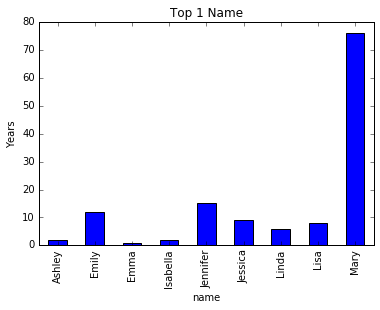

In [43]:
girls_name.groupby('name')['number'].count().plot(kind='bar', title='Top 1 Name')
plt.ylabel('Years')

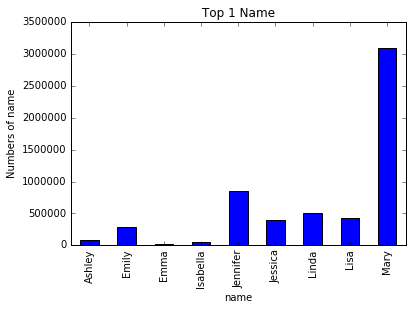

In [44]:
girls_name.groupby('name')['number'].apply(sum).plot(kind='bar', title='Top 1 Name')
plt.ylabel('Numbers of name')

**Name changes over year**

In [54]:
def get_top1k(group):
    return group.sort_values(by = 'number', ascending = False)[:1001]

In [55]:
top1k = names.groupby(['sex','year']).apply(get_top1k)

top1k.head()

name sex  number  year      prop
sex year                                         
F   1880 0       Mary   F    7065  1880  0.077643
         1       Anna   F    2604  1880  0.028618
         2       Emma   F    2003  1880  0.022013
         3  Elizabeth   F    1939  1880  0.021309
         4     Minnie   F    1746  1880  0.019188

In [60]:
top1k_table = top1k.pivot_table(values='number', index='year', columns='name', aggfunc=sum)

top1k_table.head()

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN


array([<matplotlib.axes._subplots.AxesSubplot object at 0x11FD64D0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x17A5BEF0>], dtype=object)

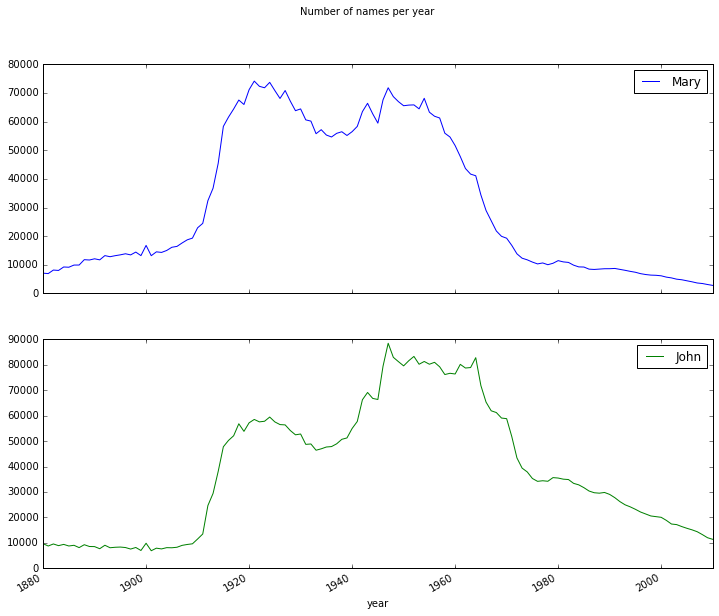

In [61]:
subtable = top1k_table[['Mary','John']]
subtable.plot(subplots=True, figsize = (12,10), grid= False, title='Number of names per year')

**New names**

In [77]:
top1k_prop = top1k.pivot_table('prop', index='year', columns='sex', aggfunc=sum)

top1k_prop.head()

sex,F,M
year,,
1880,1.000000,0.997421
1881,1.000000,1.000000
1882,0.998748,0.995690
1883,0.997641,0.998614
1884,0.993203,0.994583


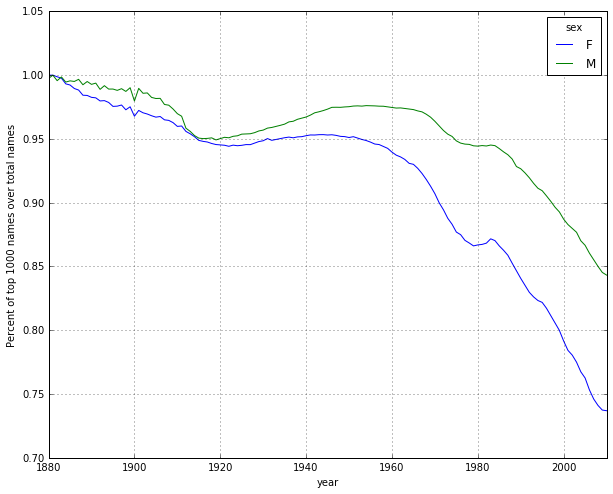

In [80]:
top1k_prop.plot(figsize=(10,8), grid=True)
plt.ylabel('Percent of top 1000 names over total names')

More children have uncommon names.